## Jupyter Notebook to test prediction results

This scripts import the dataset then try to plot some results to 

1. Plot ground truth images 
2. Plot prediction images
3. Calculate R and P

### Prepatation

Data Import and Prepare

In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
from utils import imageUtils
from utils import postProcessing
from utils import MultiDefectDetectionDataset
from utils import evaluation
from utils import visualization
import numpy as np
import os
from chainercv.links import FasterRCNNVGG16
from chainercv.visualizations import vis_bbox
from chainercv.visualizations import vis_image
from chainercv.utils import write_image
import chainer
import math
from chainercv import utils
%matplotlib inline
import matplotlib.pyplot as plt

In [32]:
#load Data
root = './data/3Types/Data3TypesYminXminYmaxXmax5'
dataset = MultiDefectDetectionDataset(data_dir=root, split='train')
dataset_test = MultiDefectDetectionDataset(data_dir=root, split='test')
bbox_label_names = ('111', 'dot','100')

In [33]:
# DataSet Statistics
print('total number of training images: ', len(dataset))
print('total number of test images: ', len(dataset_test))
print('type of defects: ', bbox_label_names)

total number of training images:  153
total number of test images:  12
type of defects:  ('111', 'dot', '100')


### Show Data Set

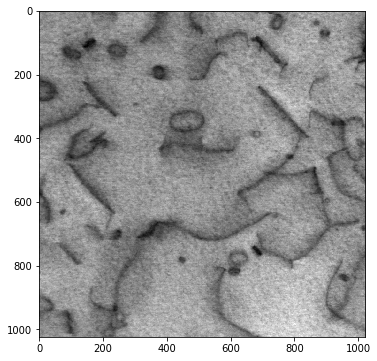

In [36]:
# plot both original image and gt image

img_1, bbs_1, lbs1 = dataset_test[1]

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1, 1, 1)

img_1 = img_1.transpose((1, 2, 0))[:, :, 0]
ax1.imshow(img_1, cmap='gray')


fig.savefig("test1.png")

In [ ]:
# plot both original image and gt image

img_1, bbs_1, lbs1 = dataset_test[1]

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
# plot prediction
vis_image(img_1,ax=ax1)

#img_1 = img_1.transpose((1, 2, 0))[:, :, 0]
#ax1.imshow(img_1, cmap='gray')

# plot ground truth
visualization.vis_bbox(img_1, bbs_1, lbs1, label_names=bbox_label_names,ax=ax2)
fig.savefig("test1.png")




img_1

In [ ]:
# get image annotation plot by name
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1, 1, 1)
img, bbox, label = dataset.get_example_by_name('4ROI_100kx_4100CL_foil1')
visualization.vis_bbox(img, bbox, label, label_names=bbox_label_names, ax=ax1)
#plt.show()
plt.savefig('f1.jpg')


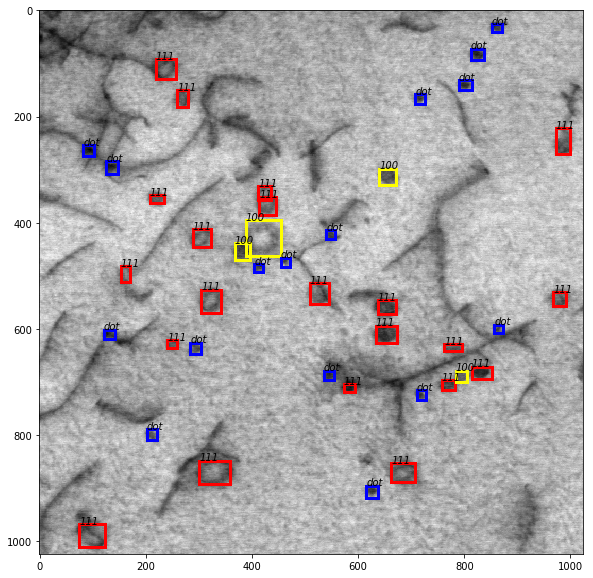

In [8]:
# Another Figure
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1, 1, 1)
img, bbox, label = dataset[50]
visualization.vis_bbox(img, bbox, label, label_names=bbox_label_names, ax=ax1)
plt.show()



# Testing

Set `use_gpu = False` because we use CPU to do testing

In [37]:
use_gpu = False
proposal_params = {'min_size': 8}
model = FasterRCNNVGG16(n_fg_class=3, pretrained_model='./modelResults/snapshot_model_100000_dataset4_20180831.npz', ratios=[ 0.5, 1, 1.5, 2, 2.5, 3, 3.5,4],anchor_scales=[1, 4, 8, 16], min_size=1024, max_size=1024,proposal_creator_params=proposal_params)

if use_gpu:
    chainer.cuda.get_device_from_id(0).use()
    model.to_gpu()
    
bbox_label_names = ('111', 'dot','100')

#### View Prediction Results

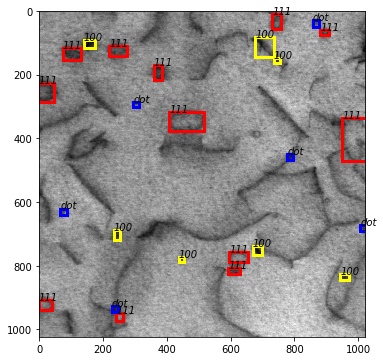

In [38]:
img_1, bbs_1, lbs1 = dataset_test[1]
model.score_thresh = 0.1
bboxes, labels, scores = model.predict([img_1])
fig = plt.figure(figsize=(15,6))
 
ax2 = fig.add_subplot(1, 1, 1)

# plot ground truth
visualization.vis_bbox(img_1, bbs_1, lbs1, label_names=bbox_label_names,ax=ax2)
fig.savefig("test1.png")

#### First figure

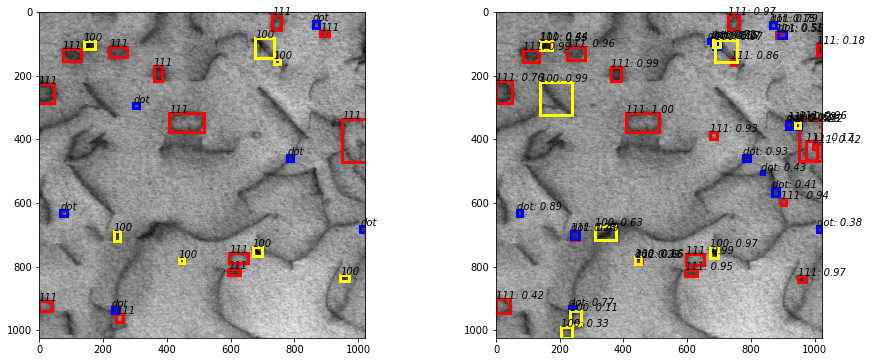

In [16]:
# Prediction of first image
img_1, bbs_1, lbs1 = dataset_test[1]
model.score_thresh = 0.1
bboxes, labels, scores = model.predict([img_1])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1, 2, 2)
ax2 = fig.add_subplot(1, 2, 1)
# plot prediction
visualization.vis_bbox(img_1, bboxes[0], labels[0], scores[0], label_names=bbox_label_names, ax=ax1)
# plot ground truth
visualization.vis_bbox(img_1, bbs_1, lbs1, label_names=bbox_label_names,ax=ax2)
fig.savefig("test1.png")

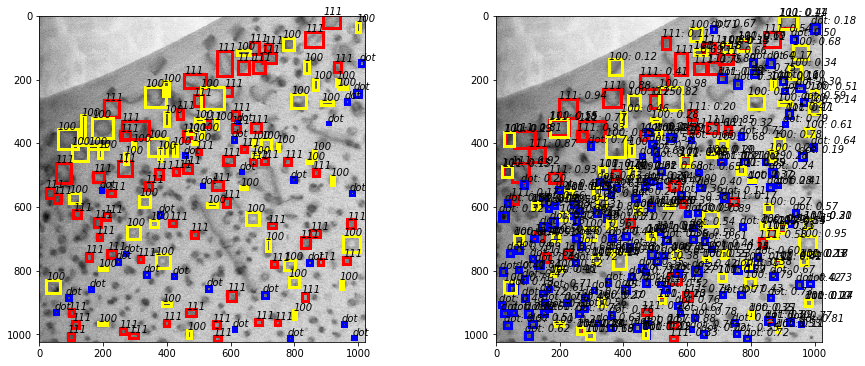

In [17]:
# Prediction of first image
img_1, bbs_1, lbs1 = dataset_test[2]
model.score_thresh = 0.1
bboxes, labels, scores = model.predict([img_1])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1, 2, 2)
ax2 = fig.add_subplot(1, 2, 1)
# plot prediction
visualization.vis_bbox(img_1, bboxes[0], labels[0], scores[0], label_names=bbox_label_names, ax=ax1)
# plot ground truth
visualization.vis_bbox(img_1, bbs_1, lbs1, label_names=bbox_label_names,ax=ax2)
fig.savefig("test2.png")

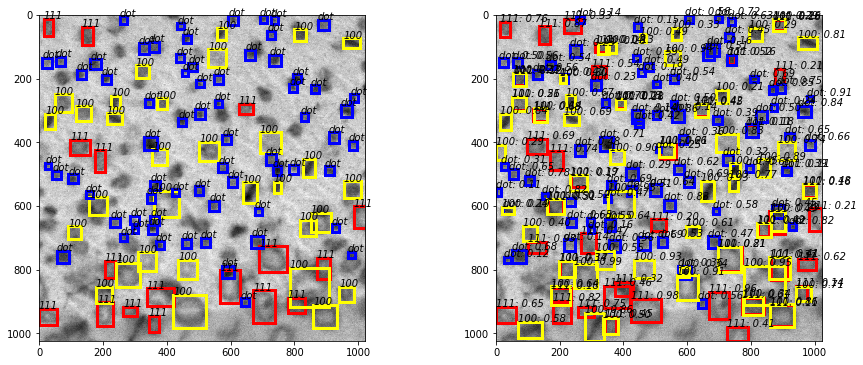

In [18]:
# Prediction of first image
img_1, bbs_1, lbs1 = dataset_test[3]
model.score_thresh = 0.1
bboxes, labels, scores = model.predict([img_1])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1, 2, 2)
ax2 = fig.add_subplot(1, 2, 1)
# plot prediction
visualization.vis_bbox(img_1, bboxes[0], labels[0], scores[0], label_names=bbox_label_names, ax=ax1)
# plot ground truth
visualization.vis_bbox(img_1, bbs_1, lbs1, label_names=bbox_label_names,ax=ax2)
fig.savefig("test3.png")

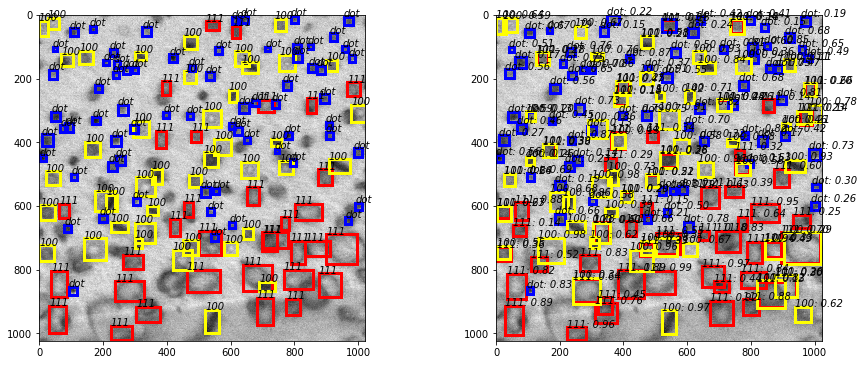

In [19]:
# Prediction of first image
img_1, bbs_1, lbs1 = dataset_test[4]
model.score_thresh = 0.1
bboxes, labels, scores = model.predict([img_1])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1, 2, 2)
ax2 = fig.add_subplot(1, 2, 1)
# plot prediction
visualization.vis_bbox(img_1, bboxes[0], labels[0], scores[0], label_names=bbox_label_names, ax=ax1)
# plot ground truth
visualization.vis_bbox(img_1, bbs_1, lbs1, label_names=bbox_label_names,ax=ax2)
fig.savefig("test4.png")

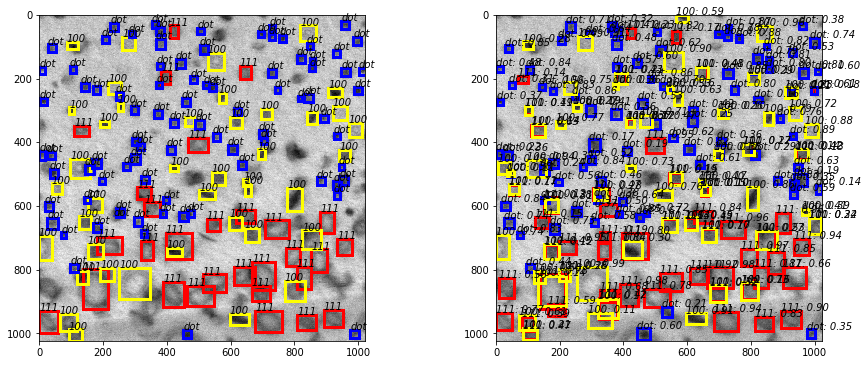

In [20]:
# Prediction of first image
img_1, bbs_1, lbs1 = dataset_test[5]
model.score_thresh = 0.1
bboxes, labels, scores = model.predict([img_1])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1, 2, 2)
ax2 = fig.add_subplot(1, 2, 1)
# plot prediction
visualization.vis_bbox(img_1, bboxes[0], labels[0], scores[0], label_names=bbox_label_names, ax=ax1)
# plot ground truth
visualization.vis_bbox(img_1, bbs_1, lbs1, label_names=bbox_label_names,ax=ax2)
fig.savefig("test5.png")

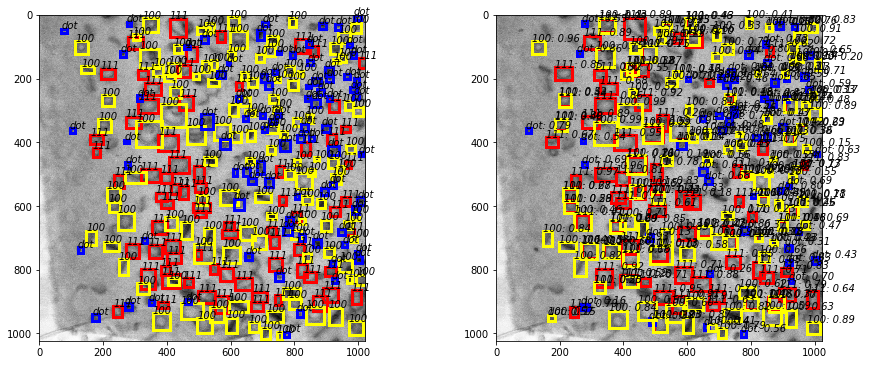

In [21]:
# Prediction of first image
img_1, bbs_1, lbs1 = dataset_test[6]
model.score_thresh = 0.1
bboxes, labels, scores = model.predict([img_1])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1, 2, 2)
ax2 = fig.add_subplot(1, 2, 1)
# plot prediction
visualization.vis_bbox(img_1, bboxes[0], labels[0], scores[0], label_names=bbox_label_names, ax=ax1)
# plot ground truth
visualization.vis_bbox(img_1, bbs_1, lbs1, label_names=bbox_label_names,ax=ax2)
fig.savefig("test6.png")

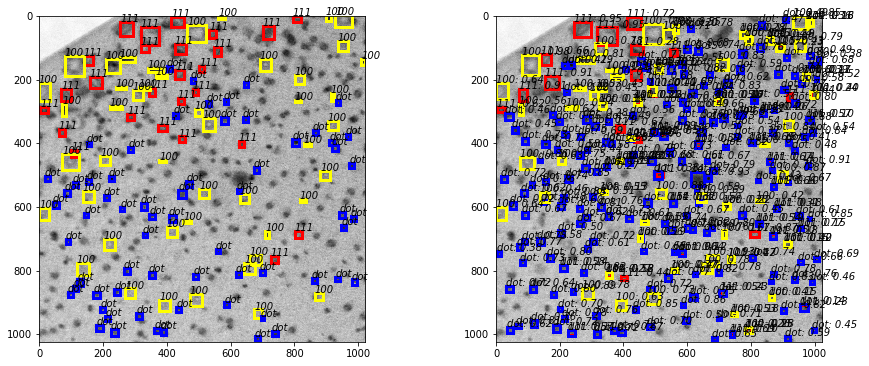

In [22]:
# Prediction of first image
img_1, bbs_1, lbs1 = dataset_test[7]
model.score_thresh = 0.1
bboxes, labels, scores = model.predict([img_1])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1, 2, 2)
ax2 = fig.add_subplot(1, 2, 1)
# plot prediction
visualization.vis_bbox(img_1, bboxes[0], labels[0], scores[0], label_names=bbox_label_names, ax=ax1)
# plot ground truth
visualization.vis_bbox(img_1, bbs_1, lbs1, label_names=bbox_label_names,ax=ax2)
fig.savefig("test7.png")

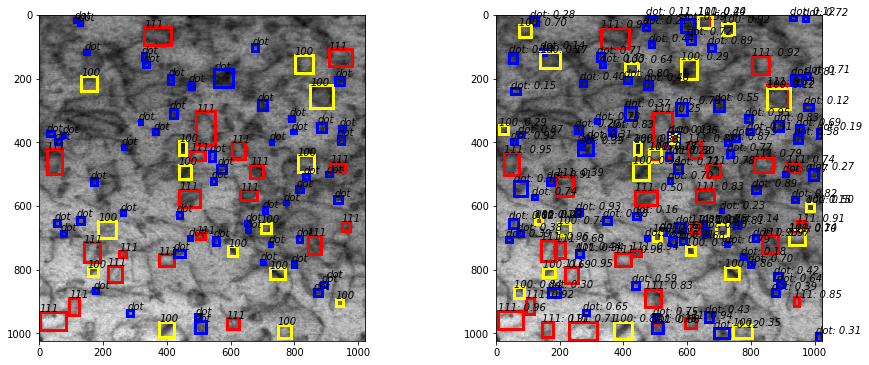

In [24]:
# Prediction of first image
img_1, bbs_1, lbs1 = dataset_test[8]
model.score_thresh = 0.1
bboxes, labels, scores = model.predict([img_1])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1, 2, 2)
ax2 = fig.add_subplot(1, 2, 1)
# plot prediction
visualization.vis_bbox(img_1, bboxes[0], labels[0], scores[0], label_names=bbox_label_names, ax=ax1)
# plot ground truth
visualization.vis_bbox(img_1, bbs_1, lbs1, label_names=bbox_label_names,ax=ax2)
fig.savefig("test0.png")

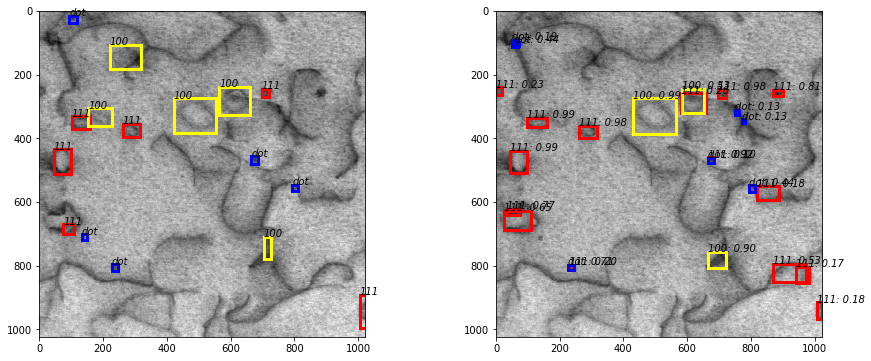

In [25]:
# Prediction of first image
img_1, bbs_1, lbs1 = dataset_test[0]
model.score_thresh = 0.1
bboxes, labels, scores = model.predict([img_1])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1, 2, 2)
ax2 = fig.add_subplot(1, 2, 1)
# plot prediction
visualization.vis_bbox(img_1, bboxes[0], labels[0], scores[0], label_names=bbox_label_names, ax=ax1)
# plot ground truth
visualization.vis_bbox(img_1, bbs_1, lbs1, label_names=bbox_label_names,ax=ax2)
fig.savefig("test4.png")

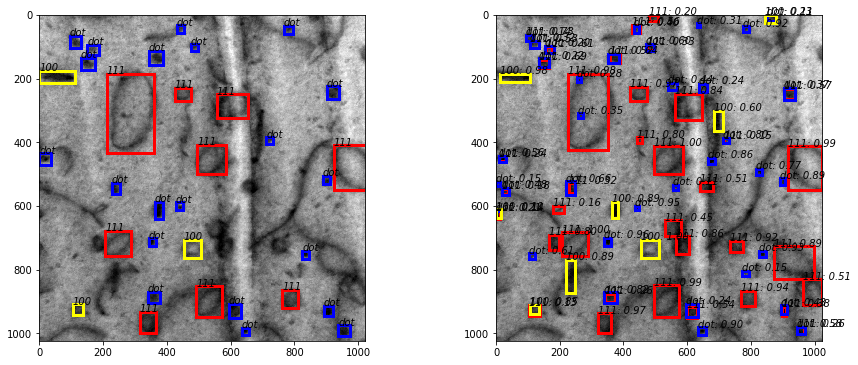

In [26]:
# Prediction of first image
img_1, bbs_1, lbs1 = dataset_test[9]
model.score_thresh = 0.1
bboxes, labels, scores = model.predict([img_1])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1, 2, 2)
ax2 = fig.add_subplot(1, 2, 1)
# plot prediction
visualization.vis_bbox(img_1, bboxes[0], labels[0], scores[0], label_names=bbox_label_names, ax=ax1)
# plot ground truth
visualization.vis_bbox(img_1, bbs_1, lbs1, label_names=bbox_label_names,ax=ax2)
fig.savefig("test9.png")

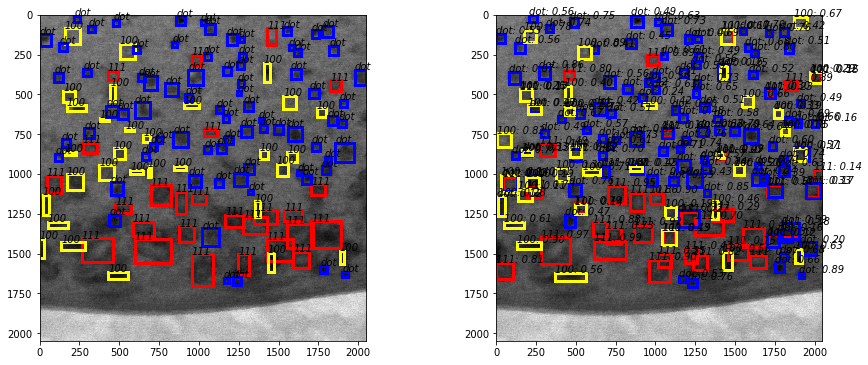

In [27]:
# Prediction of first image
img_1, bbs_1, lbs1 = dataset_test[10]
model.score_thresh = 0.1
bboxes, labels, scores = model.predict([img_1])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1, 2, 2)
ax2 = fig.add_subplot(1, 2, 1)
# plot prediction
visualization.vis_bbox(img_1, bboxes[0], labels[0], scores[0], label_names=bbox_label_names, ax=ax1)
# plot ground truth
visualization.vis_bbox(img_1, bbs_1, lbs1, label_names=bbox_label_names,ax=ax2)
fig.savefig("test10.png")

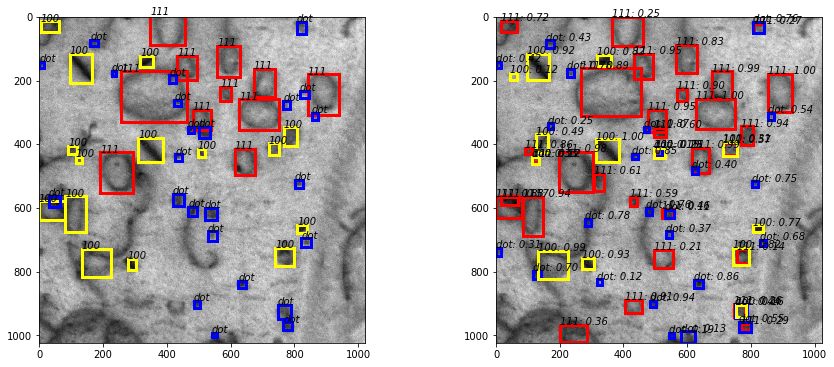

In [28]:
# Prediction of first image
img_1, bbs_1, lbs1 = dataset_test[11]
model.score_thresh = 0.1
bboxes, labels, scores = model.predict([img_1])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1, 2, 2)
ax2 = fig.add_subplot(1, 2, 1)
# plot prediction
visualization.vis_bbox(img_1, bboxes[0], labels[0], scores[0], label_names=bbox_label_names, ax=ax1)
# plot ground truth
visualization.vis_bbox(img_1, bbs_1, lbs1, label_names=bbox_label_names,ax=ax2)
fig.savefig("test11.png")

## Evaluation

In [ ]:
use_gpu = False
proposal_params = {'min_size': 8}
model = FasterRCNNVGG16(n_fg_class=3, pretrained_model='./modelResults/snapshot_model_510000_20180916_510K.npz', ratios=[ 0.5, 1, 1.5, 2, 2.5, 3, 3.5,4],anchor_scales=[1, 4, 8, 16], min_size=1024, max_size=1024,proposal_creator_params=proposal_params)

if use_gpu:
    chainer.cuda.get_device_from_id(0).use()
    model.to_gpu()
    
bbox_label_names = ('111loop', 'dot','100loop')


# Validation Set test


In [11]:
use_gpu = False
proposal_params = {'min_size': 8}
model = FasterRCNNVGG16(n_fg_class=3, pretrained_model='./modelResults/snapshot_model_510000_Decay2_20180921.npz', ratios=[ 0.5, 1, 1.5, 2, 2.5, 3, 3.5,4],anchor_scales=[1, 4, 8, 16], min_size=1024, max_size=1024,proposal_creator_params=proposal_params)

if use_gpu:
    chainer.cuda.get_device_from_id(0).use()
    model.to_gpu()
    
bbox_label_names = ('111loop', 'dot','100loop')

In [12]:
from utils.evaluation import evaluate_set_by_centroid

# Using Validation Set
dataset_test_validation = MultiDefectDetectionDataset(data_dir=root, split='test')
%time recalls, precisions = evaluate_set_by_centroid(model,dataset_test_validation , threshold=0.1)
print("Average recall ", sum(recalls)/len(recalls))
print("Average precision ", sum(precisions)/len(precisions))
r = sum(recalls)/len(recalls)
p = sum(precisions)/len(precisions)
print("Average F1", 2 * r * p / (r + p))

CPU times: user 5min 12s, sys: 2min 6s, total: 7min 19s
Wall time: 6min 44s
Average recall  0.8538476600333081
Average precision  0.7534955320189201
Average F1 0.8005389266475982


In [8]:
# loop over from a list of possible threshold values 
# According to ChainerCV Document
# > algorithm runs with a very low score_thresh so that bounding boxes with low scores are kept. It is known that lower score_thresh produces higher mAP.
# try values from [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
threshodVal = [0.9, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
recall_List = list()
precision_List = list()

for valItem in threshodVal:
    print(valItem)
    recalls, precisions = evaluate_set_by_centroid(model, dataset_test, threshold= valItem)
    recall_List.append(sum(recalls)/len(recalls))
    precision_List.append(sum(precisions)/len(precisions) )

0.9


0.5


0.1


0.05


0.01


0.005


0.001


0.0005


0.0001


0.948, 0.223, 0.361
0.804, 0.689, 0.742
0.718, 0.880, 0.791
0.693, 0.898, 0.783
0.656, 0.915, 0.764
0.643, 0.919, 0.757
0.624, 0.925, 0.745
0.622, 0.924, 0.744
0.622, 0.926, 0.744


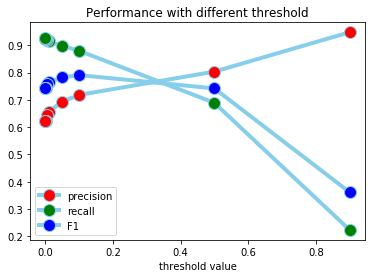

In [9]:
F1_List = list()
for i in range(0,len(recall_List)):
    F1 = (2 * precision_List[i]* recall_List[i])/(precision_List[i]+recall_List[i])
    print("%.3f, %.3f, %.3f" % (precision_List[i],recall_List[i],F1))
    F1_List.append(F1)
    

# Plotting Results
import matplotlib.pyplot as plt
fignow = plt.figure()
plt.plot( threshodVal, precision_List, marker='o', markerfacecolor='red', markersize=12, color='skyblue', linewidth=4, label='precision')
plt.plot( threshodVal, recall_List, marker='o', markerfacecolor='green', markersize=12, color='skyblue', linewidth=4,label='recall')
plt.plot( threshodVal, F1_List, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4,label='F1')
plt.title("Performance with different threshold")
plt.xlabel('threshold value')
plt.legend()
plt.show()
fignow.savefig("F1-model.png",format = "png")

# =============================

CPU times: user 5min 19s, sys: 2min 12s, total: 7min 31s
Wall time: 7min 20s
Average recall  0.8445413197048723
Average precision  0.7494774846524527
Average F1 0.7941747013864981
0.9


0.5


0.1


0.05


0.01


0.005


0.001


0.0005


0.0001


0.882, 0.400, 0.550
0.814, 0.728, 0.769
0.749, 0.845, 0.794
0.737, 0.863, 0.795
0.695, 0.881, 0.777
0.676, 0.885, 0.766
0.643, 0.891, 0.747
0.634, 0.896, 0.742
0.621, 0.898, 0.735


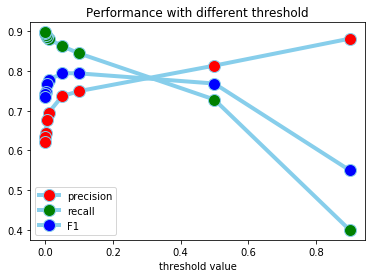

In [4]:
use_gpu = False
proposal_params = {'min_size': 8}
model = FasterRCNNVGG16(n_fg_class=3, pretrained_model='./modelResults/snapshot_model_510000_20181001_DataSet6WithDA.npz', ratios=[ 0.5, 1, 1.5, 2, 2.5, 3, 3.5,4],anchor_scales=[1, 4, 8, 16], min_size=1024, max_size=1024,proposal_creator_params=proposal_params)

if use_gpu:
    chainer.cuda.get_device_from_id(0).use()
    model.to_gpu()
    
bbox_label_names = ('111loop', 'dot','100loop')

from utils.evaluation import evaluate_set_by_centroid

# Using Validation Set
dataset_test_validation = MultiDefectDetectionDataset(data_dir=root, split='test')
%time recalls, precisions = evaluate_set_by_centroid(model,dataset_test_validation , threshold=0.1)
print("Average recall ", sum(recalls)/len(recalls))
print("Average precision ", sum(precisions)/len(precisions))
r = sum(recalls)/len(recalls)
p = sum(precisions)/len(precisions)
print("Average F1", 2 * r * p / (r + p))

# loop over from a list of possible threshold values 
# According to ChainerCV Document
# > algorithm runs with a very low score_thresh so that bounding boxes with low scores are kept. It is known that lower score_thresh produces higher mAP.
# try values from [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
threshodVal = [0.9, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
recall_List = list()
precision_List = list()

for valItem in threshodVal:
    print(valItem)
    recalls, precisions = evaluate_set_by_centroid(model, dataset_test, threshold= valItem)
    recall_List.append(sum(recalls)/len(recalls))
    precision_List.append(sum(precisions)/len(precisions) )
F1_List = list()
for i in range(0,len(recall_List)):
    F1 = (2 * precision_List[i]* recall_List[i])/(precision_List[i]+recall_List[i])
    print("%.3f, %.3f, %.3f" % (precision_List[i],recall_List[i],F1))
    F1_List.append(F1)
    

# Plotting Results
import matplotlib.pyplot as plt
fignow = plt.figure()
plt.plot( threshodVal, precision_List, marker='o', markerfacecolor='red', markersize=12, color='skyblue', linewidth=4, label='precision')
plt.plot( threshodVal, recall_List, marker='o', markerfacecolor='green', markersize=12, color='skyblue', linewidth=4,label='recall')
plt.plot( threshodVal, F1_List, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4,label='F1')
plt.title("Performance with different threshold")
plt.xlabel('threshold value')
plt.legend()
plt.show()
fignow.savefig("F1-model.png",format = "png")

In [6]:
use_gpu = False
proposal_params = {'min_size': 8}
model = FasterRCNNVGG16(n_fg_class=3, pretrained_model='./modelResults/snapshot_model_510000_20181001_DataSet6WithDA.npz', ratios=[ 0.5, 1, 1.5, 2, 2.5, 3, 3.5,4],anchor_scales=[1, 4, 8, 16], min_size=1024, max_size=1024,proposal_creator_params=proposal_params)

if use_gpu:
    chainer.cuda.get_device_from_id(0).use()
    model.to_gpu()
    
bbox_label_names = ('111loop', 'dot','100loop')

from utils.evaluation import evaluate_set_by_centroid

# Using Validation Set
dataset_test_validation = MultiDefectDetectionDataset(data_dir=root, split='test')
%time recalls, precisions = evaluate_set_by_centroid(model,dataset_test_validation , threshold=0.005)
print("Average recall ", sum(recalls)/len(recalls))
print("Average precision ", sum(precisions)/len(precisions))
r = sum(recalls)/len(recalls)
p = sum(precisions)/len(precisions)
print("Average F1", 2 * r * p / (r + p))

CPU times: user 4min 57s, sys: 1min 42s, total: 6min 40s
Wall time: 5min 55s
Average recall  0.885058483642759
Average precision  0.6757139053626515
Average F1 0.7663466225689644


In [ ]:
# Data Augmentation
train_data = TransformDataset(dataset, Transform(model))
print(len(dataset))
print(len(train_data))
import os
print(os.getcwd())

In [2]:
area_loc_error_list = [(1, 288.5660709440708), (0, 578.2372815568233), (1, 160.0876698642969), (1, 191.40089857578278), (1, 399.46543250977993), (1, 180.98426945507526), (1, 217.88595147058368), (1, 311.9444395005703), (1, 360.7673864811659), (1, 430.99843659996986), (1, 328.51019287109375), (1, 248.32037629187107), (1, 274.11457373853773), (1, 208.82858304679394), (1, 419.16946244239807), (1, 563.1614236906171), (1, 286.26883238554), (1, 120.9532168507576), (1, 295.9936656653881), (1, 347.2181807681918), (1, 211.6888013742864), (1, 294.72812708839774), (1, 192.86974073946476), (1, 402.9789113998413), (1, 328.9470643401146), (1, 163.26277646422386), (1, 133.40534964203835), (1, 230.8353348299861), (1, 405.0346226245165), (1, 394.23467825353146), (1, 190.346377260983), (1, 377.6475332379341), (1, 371.51454516872764), (1, 158.13046268373728), (1, 186.2928757071495), (1, 400.446948222816), (1, 220.65972350537777), (1, 250.2692111134529), (1, 363.1681542918086), (1, 447.13433861732483), (1, 244.7970676422119), (2, 103.61684253439307), (2, 154.87974353134632), (0, 1860.6373020485044), (1, 513.5130980014801), (1, 675.0912299603224), (1, 1186.750485424418), (1, 504.2985861245543), (1, 566.2645853636786), (1, 613.8764634728432), (2, 671.5624861549586), (2, 1591.7694260012358), (0, 1181.799659994169), (0, 1752.367133360356), (1, 303.05076599121094), (1, 191.61046087741852), (1, 346.58422600850463), (1, 152.058363430202), (1, 591.8327903598547), (1, 333.16145050525665), (2, 1674.3112363012042), (0, 1880.2022840711288), (0, 203.3952632106375), (0, 3433.64176999731), (0, 5410.044097781181), (1, 350.0942668025382), (1, 1593.9353919550776), (1, 518.6946469545364), (1, 773.3964912369847), (1, 291.87567693181336), (1, 337.7809159345925), (1, 914.5799745619297), (1, 262.3237296808511), (1, 1187.396205868572), (1, 391.6686157770455), (2, 752.9962869435549), (0, 993.8717591166496), (1, 466.35290847718716), (1, 152.03119678929215)]

In [3]:
print(len(area_loc_error_list))

79


In [10]:
import pandas as pd
areaDF = pd.DataFrame(columns=['classlabel','area'])

for i, (classlabel, area) in enumerate(area_loc_error_list):
    areaDF.loc[i] = [classlabel, area]


In [11]:
areaDF.head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>classlabel</th>
      <th>area</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1.0</td>
      <td>288.566071</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.0</td>
      <td>578.237282</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1.0</td>
      <td>160.087670</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1.0</td>
      <td>191.400899</td>
    </tr>
    <tr>
      <th>4</th>
      <td>1.0</td>
      <td>399.465433</td>
    </tr>
  </tbody>
</table>
</div>

<Figure size 1080x432 with 0 Axes>

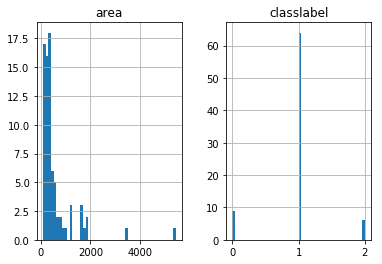

In [22]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(15,6))
fig, ax = plt.subplots(1,2)
areaDF.hist(bins=50, ax=ax)
fig.savefig('example.png') 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111fad2e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x111fc3828>]], dtype=object)